In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [2]:
np.random.seed(123456789)
y = np.array([1, 2, 3, 4, 5])
x1 = np.array([6, 7, 8, 9, 10])
x1 = np.array([6, 7, 8, 9, 10])
x2 = np.array([11, 12, 13, 14, 15])
X = np.vstack([np.ones(5), x1, x2, x1*x2]).T
X
beta, res, rank, sval = np.linalg.lstsq(X, y)
beta
data = {"y": y, "x1": x1, "x2": x2}
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1*x2", data)
y
X
type(X)
np.array(X)
df_data = pd.DataFrame(data)
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1:x2", df_data, return_type="dataframe")
X
model = sm.OLS(y, X)
result = model.fit()
result = model.fit()
result.params
model = smf.ols("y ~ 1 + x1 + x2 + x1:x2", df_data)
result = model.fit()
result.params
print(result.summary())
beta
from collections import defaultdict
data = defaultdict(lambda: np.array([1,2,3]))
patsy.dmatrices("y ~ a", data=data)[1].design_info.term_names
patsy.dmatrices("y ~ 1 + a + b", data=data)[1].design_info.term_names
patsy.dmatrices("y ~ -1 + a + b", data=data)[1].design_info.term_names
patsy.dmatrices("y ~ a * b", data=data)[1].design_info.term_names
patsy.dmatrices("y ~ a * b * c", data=data)[1].design_info.term_names
patsy.dmatrices("y ~ a * b * c - a:b:c", data=data)[1].design_info.term_names
data = {k: np.array([]) for k in ["y", "a", "b", "c"]}
patsy.dmatrices("y ~ a + b", data=data)[1].design_info.term_names
patsy.dmatrices("y ~ I(a + b)", data=data)[1].design_info.term_names
patsy.dmatrices("y ~ a*a", data=data)[1].design_info.term_names
patsy.dmatrices("y ~ I(a**2)", data=data)[1].design_info.term_names
patsy.dmatrices("y ~ np.log(a) + b", data=data)[1].design_info.term_names
z = lambda x1, x2: x1+x2
patsy.dmatrices("y ~ z(a, b)", data=data)[1].design_info.term_names

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
/home/user/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.807e+27
Date:                Sun, 25 Feb 2024   Prob (F-statistic):           3.56e-28
Time:                        20:31:31   Log-Likelihood:                 149.18
No. Observations:                   5   AIC:                            -292.4
Df Residuals:                       2   BIC:                            -293.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5556   9.62e-14  -5.77e+12      0.0

['Intercept', 'z(a, b)']

In [3]:
data = {"y": [1, 2, 3], "a": [1, 2, 3]}
patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]
patsy.dmatrices("y ~ - 1 + C(a)", data=data, return_type="dataframe")[1]
data = {"y": [1, 2, 3], "a": ["type A", "type B", "type C"]}
patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]
patsy.dmatrices("y ~ - 1 + C(a, Poly)", data=data, return_type="dataframe")[1]

,"C(a, Poly).Constant","C(a, Poly).Linear","C(a, Poly).Quadratic"
0,1.0,-7.071068e-01,0.408248
1,1.0,-5.551115e-17,-0.816497
2,1.0,7.071068e-01,0.408248


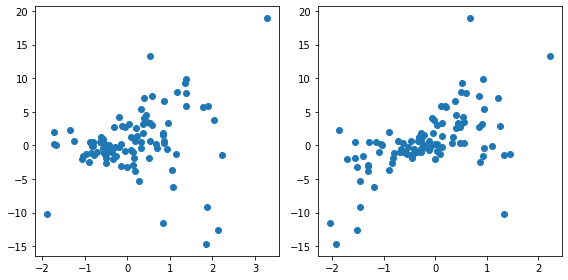

In [4]:
np.random.seed(123456789)
N = 100
x1 = np.random.randn(N)
x2 = np.random.randn(N)
data = pd.DataFrame({"x1": x1, "x2": x2})
def y_true(x1, x2):
    return 1  + 2 * x1 + 3 * x2 + 4 * x1 * x2
data["y_true"] = y_true(x1, x2)
e = np.random.randn(N)
data["y"] = data["y_true"] + e
data.head()
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].scatter(data["x1"], data["y"])
axes[1].scatter(data["x2"], data["y"])

fig.tight_layout()
data.shape
model = smf.ols("y ~ x1 + x2", data)
result = model.fit()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     29.76
Date:                Sun, 25 Feb 2024   Prob (F-statistic):           8.36e-11
Time:                        20:38:23   Log-Likelihood:                -271.52
No. Observations:                 100   AIC:                             549.0
Df Residuals:                      97   BIC:                             556.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9868      0.382      2.581      0.0

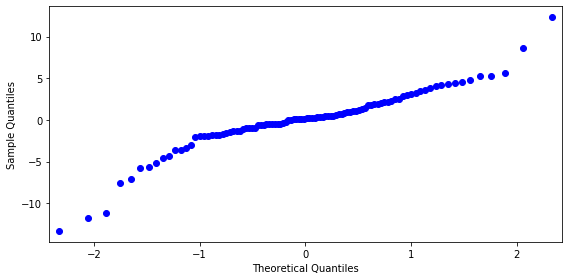

In [5]:
print(result.summary())
result.rsquared
result.resid.head()
z, p = stats.normaltest(result.resid.values)
p
result.params
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

fig.tight_layout()
fig.savefig("ch14-qqplot-model-1.pdf")
model = smf.ols("y ~ x1 + x2 + x1*x2", data)
result = model.fit()
print(result.summary())
result.params
result.rsquared
z, p = stats.normaltest(result.resid.values)

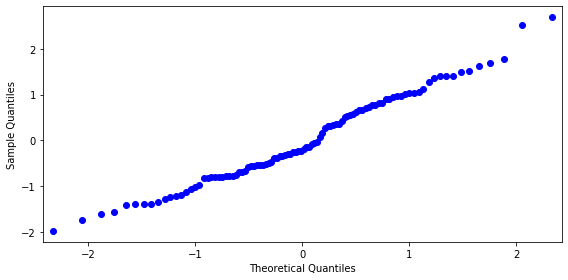

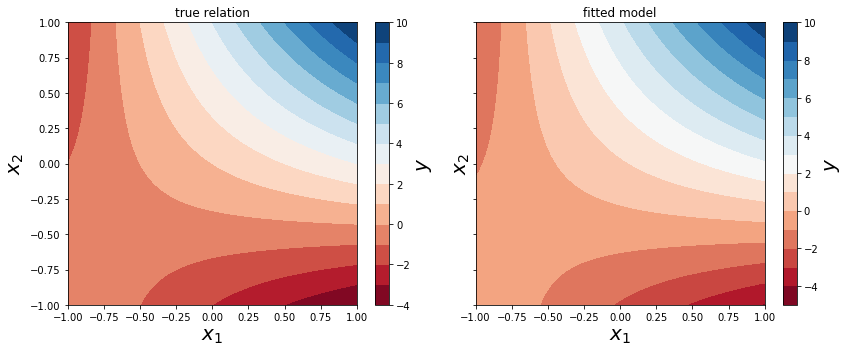

In [6]:
p
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

fig.tight_layout()
fig.savefig("ch14-qqplot-model-2.pdf")
x = np.linspace(-1, 1, 50)
X1, X2 = np.meshgrid(x, x)
new_data = pd.DataFrame({"x1": X1.ravel(), "x2": X2.ravel()})
y_pred = result.predict(new_data)
y_pred.shape
y_pred = y_pred.values.reshape(50, 50)
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

def plot_y_contour(ax, Y, title):
    c = ax.contourf(X1, X2, Y, 15, cmap=plt.cm.RdBu)
    ax.set_xlabel(r"$x_1$", fontsize=20)
    ax.set_ylabel(r"$x_2$", fontsize=20)
    ax.set_title(title)
    cb = fig.colorbar(c, ax=ax)
    cb.set_label(r"$y$", fontsize=20)

plot_y_contour(axes[0], y_true(X1, X2), "true relation")
plot_y_contour(axes[1], y_pred, "fitted model")

fig.tight_layout()
fig.savefig("ch14-comparison-model-true.pdf")

In [7]:
dataset = sm.datasets.get_rdataset("Icecream", "Ecdat")
dataset.title
print(dataset.__doc__)
dataset.data.info()
model = smf.ols("cons ~ -1 + price + temp", data=dataset.data)
result = model.fit()
print(result.summary())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

smg.plot_fit(result, 0, ax=ax1)
smg.plot_fit(result, 1, ax=ax2)

fig.tight_layout()
fig.savefig("ch14-regressionplots.pdf")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.regplot("price", "cons", dataset.data, ax=ax1);
sns.regplot("temp", "cons", dataset.data, ax=ax2);

fig.tight_layout()
fig.savefig("ch14-regressionplots-seaborn.pdf")

URLError: <urlopen error [Errno -2] Name or service not known>

In [8]:
df = sm.datasets.get_rdataset("iris").data
df.info()
df.Species.unique()
df_subset = df[(df.Species == "versicolor") | (df.Species == "virginica" )].copy()
df_subset = df[df.Species.isin(["versicolor", "virginica"])].copy()
df_subset.Species = df_subset.Species.map({"versicolor": 1, "virginica": 0})
df_subset.rename(columns={"Sepal.Length": "Sepal_Length", "Sepal.Width": "Sepal_Width",
                          "Petal.Length": "Petal_Length", "Petal.Width": "Petal_Width"}, inplace=True)
df_subset.head(3)
model = smf.logit("Species ~ Sepal_Length + Sepal_Width + Petal_Length + Petal_Width", data=df_subset)
result = model.fit()
print(result.summary())
print(result.get_margeff().summary())
model = smf.logit("Species ~ Petal_Length + Petal_Width", data=df_subset)

URLError: <urlopen error [Errno -2] Name or service not known>

In [9]:
result = model.fit()
print(result.summary())
print(result.get_margeff().summary())
params = result.params
beta0 = -params['Intercept']/params['Petal_Width']
beta1 = -params['Petal_Length']/params['Petal_Width']

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     684.5
Date:                Sun, 25 Feb 2024   Prob (F-statistic):           1.21e-64
Time:                        20:54:28   Log-Likelihood:                -140.01
No. Observations:                 100   AIC:                             288.0
Df Residuals:                      96   BIC:                             298.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8706      0.103      8.433      0.0

AttributeError: 'OLSResults' object has no attribute 'get_margeff'

In [10]:
df_new = pd.DataFrame({"Petal_Length": np.random.randn(20)*0.5 + 5,
                       "Petal_Width": np.random.randn(20)*0.5 + 1.7})
df_new["P-Species"] = result.predict(df_new)
df_new["P-Species"].head(3)
df_new["Species"] = (df_new["P-Species"] > 0.5).astype(int)
df_new.head()
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(df_subset[df_subset.Species == 0].Petal_Length.values,
        df_subset[df_subset.Species == 0].Petal_Width.values, 's', label='virginica')
ax.plot(df_new[df_new.Species == 0].Petal_Length.values,
        df_new[df_new.Species == 0].Petal_Width.values,
        'o', markersize=10, color="steelblue", label='virginica (pred.)')

ax.plot(df_subset[df_subset.Species == 1].Petal_Length.values,
        df_subset[df_subset.Species == 1].Petal_Width.values, 's', label='versicolor')
ax.plot(df_new[df_new.Species == 1].Petal_Length.values,
        df_new[df_new.Species == 1].Petal_Width.values,
        'o', markersize=10, color="green", label='versicolor (pred.)')

_x = np.array([4.0, 6.1])
ax.plot(_x, beta0 + beta1 * _x, 'k')

ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend(loc=2)
fig.tight_layout()
fig.savefig("ch14-logit.pdf")

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Number of rows mismatch between data argument and x1 (20 versus 100)
    y ~ x1 + x2 + x1*x2
        ^^

In [11]:
dataset = sm.datasets.get_rdataset("discoveries")
df = dataset.data.set_index("time").rename(columns={"value": "discoveries"})
df.head(10).T
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
df.plot(kind='bar', ax=ax)
fig.tight_layout()
fig.savefig("ch14-discoveries.pdf")
model = smf.poisson("discoveries ~ 1", data=df)

URLError: <urlopen error [Errno -2] Name or service not known>

In [ ]:
result = model.fit()
print(result.summary())
lmbda = np.exp(result.params) 
X = stats.poisson(lmbda)
result.conf_int()
X_ci_l = stats.poisson(np.exp(result.conf_int().values)[0, 0])
X_ci_u = stats.poisson(np.exp(result.conf_int().values)[0, 1])
v, k = np.histogram(df.values, bins=12, range=(0, 12), normed=True)
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.bar(k[:-1], v, color="steelblue",  align='center', label='Dicoveries per year') 
ax.bar(k-0.125, X_ci_l.pmf(k), color="red", alpha=0.5, align='center', width=0.25, label='Poisson fit (CI, lower)')
ax.bar(k, X.pmf(k), color="green",  align='center', width=0.5, label='Poisson fit')
ax.bar(k+0.125, X_ci_u.pmf(k), color="red",  alpha=0.5, align='center', width=0.25, label='Poisson fit (CI, upper)')

ax.legend()
fig.tight_layout()
fig.savefig("ch14-discoveries-per-year.pdf")
df = pd.read_csv("temperature_outdoor_2014.tsv", header=None, delimiter="\t", names=["time", "temp"])
df.time = pd.to_datetime(df.time, unit="s")
df = df.set_index("time").resample("H").mean()
df_march = df[df.index.month == 3]
df_april = df[df.index.month == 4]
df_march.plot(figsize=(12, 4));
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
smg.tsa.plot_acf(df_march.temp, lags=72, ax=axes[0])
smg.tsa.plot_acf(df_march.temp.diff().dropna(), lags=72, ax=axes[1])
smg.tsa.plot_acf(df_march.temp.diff().diff().dropna(), lags=72, ax=axes[2])
smg.tsa.plot_acf(df_march.temp.diff().diff().diff().dropna(), lags=72, ax=axes[3])
fig.tight_layout()
fig.savefig("ch14-timeseries-autocorrelation.pdf")
model = sm.tsa.AR(df_march.temp)
result = model.fit(72)
sm.stats.durbin_watson(result.resid)
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
smg.tsa.plot_acf(result.resid, lags=72, ax=ax)
fig.tight_layout()
fig.savefig("ch14-timeseries-resid-acf.pdf")
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(df_march.index.values[-72:], df_march.temp.values[-72:], label="train data")
ax.plot(df_april.index.values[:72], df_april.temp.values[:72], label="actual outcome")
ax.plot(pd.date_range("2014-04-01", "2014-04-4", freq="H").values,
        result.predict("2014-04-01", "2014-04-4"), label="predicted outcome")

ax.legend()
fig.tight_layout()
fig.savefig("ch14-timeseries-prediction.pdf")
df_march = df_march.resample("D").mean()
df_april = df_april.resample("D").mean()
model = sm.tsa.ARMA(df_march, (4, 1))
result = model.fit()
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(df_march.index.values[-3:], df_march.temp.values[-3:], 's-', label="train data")
ax.plot(df_april.index.values[:3], df_april.temp.values[:3], 's-', label="actual outcome")
ax.plot(pd.date_range("2014-04-01", "2014-04-3").values,
        result.predict("2014-04-01", "2014-04-3"), 's-', label="predicted outcome")
ax.legend()
fig.tight_layout()
%reload_ext version_information
%version_information numpy, matplotlib, pandas, scipy, statsmodels, patsy